# Clasificación de digitos MNIST usando ANN con Pytorch

Primero se procede a importar las librerias necesarias:

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

A continuación, se procede a crear una rutina para la transformación de los datos a TENSORES, para que queden estandarizados y normalizados:

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,), (0.5,)),])

Seguido, se bajan los datos en los diferentes conjuntos:

In [3]:
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

De seguido se verifica el tamaño de los conjutos de datos:

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


Se observa como tenemos grupos (batches) de tamano 64 y cada imagen es de 28x28, en el caso de las etiquetas son 64.

Se visualiza el conjunto de datos:

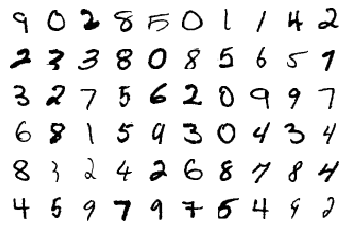

In [5]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

Se contruye una red neuronal como la sugerida en la imagen:

<img src="annmnist.png" style="height:300px">

In [ ]:
input_size = 
hidden_sizes = []
output_size =

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.?(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.?(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.?(dim=1))
print(model)

Se construye el modelo de optimización:

In [7]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

y el de backpropagation:

In [8]:
optimizer = optim.SGD(model.parameters(), lr=?, momentum=0.9)
time0 = time()
epochs = ?
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
        print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6382316522347902

Training Time (in minutes) = 0.13278685013453165
Epoch 1 - Training loss: 0.2815573007575294

Training Time (in minutes) = 0.2653865178426107
Epoch 2 - Training loss: 0.21772648534699798

Training Time (in minutes) = 0.40558040142059326
Epoch 3 - Training loss: 0.1758422119094174

Training Time (in minutes) = 0.5463551998138427
Epoch 4 - Training loss: 0.14691708718877294

Training Time (in minutes) = 0.6866559863090516


Rutinas para la visualización de los resultados:

In [9]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

Evaluación del modelo:

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count)*100)